In [2]:
from pycalphad import Database, variables as v
from espei.datasets import recursive_glob, load_datasets
from espei.plot import dataplot
from tinydb import where, Query
import matplotlib.pyplot as plt

['LIQUID', 'BCC_A2', 'D_NIMO', 'FCC_A1']
['BCC_A2', 'D_NIMO', 'LIQUID']
['D_NIMO', 'BCC_A2', 'LIQUID', 'FCC_A1', 'DELTA']
['DELTA', 'D_NIMO', 'FCC_A1', 'MONI3_59_OP8']
['MONI3_59_OP8', 'DELTA']
['FCC_A1', 'LIQUID', 'D_NIMO', 'DELTA', 'MONI3_59_OP8']
S= {'components': ['MO', 'NI', 'VA'], 'phases': ['EXP'], 'broadcast_conditions': 'false', 'output': 'ZPF', 'conditions': {'P': 101325.0, 'T': [1562.19925318551, 1566.2539533960203, 1521.778881318089, 1525.8386467381063, 1473.2921633104588, 1424.790249674307, 1372.2462988514133, 1271.1953691828603, 1569.262687843294, 1540.9684275360992, 1524.805343998638, 1472.2461975472224, 1419.7073119338356, 1373.2200853791705, 1270.1418056053628, 1169.103538960578, 1169.0883433320564, 1072.0870486645058, 1071.9984074981298, 1120.5053863437893, 1169.0047673751876, 1270.070892672262, 1371.1091593170472, 1419.616138162706, 1419.6060077436916, 1468.1155191941043, 1500.4543492927949, 1520.6696004360126, 1540.874721160216, 1552.9932349061814, 1569.16138365315,

(0.4, 0.9)

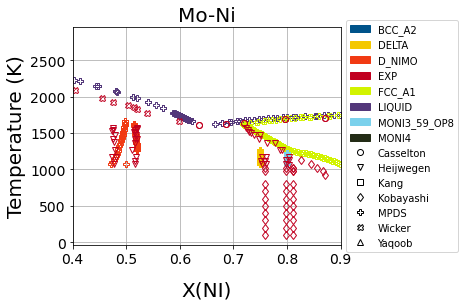

In [7]:

comps = ['MO', 'NI','VA']
#phases = list(dbf.phases.keys())
#print(phases)
conds = {v.N: 1.0, v.P: 101325, v.T: (300, 4000, 20), v.X('NI'): (0, 1, 0.02)}
datasets = load_datasets(recursive_glob('.','*.json'))

datasets.update({'reference':'MPDS'},Query().reference.search('C10'))
for records in datasets:

    if records['reference']!='MPDS':
        records['phases']=['EXP']
        print('S=',records)
        #for i in range(len(records['conditions']['T'])):
         #   records['conditions']['T'][i]=records['conditions']['T'][i]+273
        
        for i in range(len(records['values'])):
            print('N=',records['values'][i])
            for j in range(len(records['values'][i])):
                records['values'][i][j][0] = 'EXP'
        #print('Y=',records)
   
    a=records['phases']
    records['phases']=['D_NIMO' if o=='MO7NI7_19_OP56' else o for o in records['phases']]
    records['phases']=['MONI3' if o=='MONI3_59_OP' else o for o in records['phases']]
    records['phases']=['MU_PHASE' if o=='NB6.5FE6.5_166_HR39' else o for o in records['phases']]
    records['phases']=['LIQUID' if o=='L' else o for o in records['phases']]
    records['phases']=['DELTA' if o=='MONI3RT' else o for o in records['phases']]
    records['phases']=['FCC_A1' if o=='MONI4_87_TI10' or o=='FCC' else o for o in records['phases']]
#    records['phases']=['MONI3' if o=='MONI3_59_OP8' else o for o in records['phases']]
    records['phases']=['BCC_A2' if o=='MO0.98NI0.02_229_CI2'or o=='NB0.002FE0.998_229_CI2' else o for o in records['phases']]
    datasets.update({'phases':records['phases']},where('phases')==a)
    print(records['phases'])
    for i in range(len(records['values'])):
        for j in range(len(records['values'][i])):
            records['values'][i][j] = ['D_NIMO' if o=='MO7NI7_19_OP56'  else o for o in records['values'][i][j]]
            records['values'][i][j] = ['MONI3' if o=='MONI3_59_OP' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['MU_PHASE' if o=='NB6.5FE6.5_166_HR39'  else o for o in records['values'][i][j]]
            records['values'][i][j] = ['LIQUID' if o=='L' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['DELTA' if o=='MONI3RT' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['FCC_A1' if o=='MONI4_87_TI10'or o=='FCC' else o for o in records['values'][i][j]]
#            records['values'][i][j] = ['MONI3' if o=='MONI3_59_OP8' else o for o in records['values'][i][j]]
            records['values'][i][j] = ['BCC_A2' if o=='MO0.98NI0.02_229_CI2' or o=='NB0.002FE0.998_229_CI2' else o for o in records['values'][i][j]]
phases_1 = [r['phases'] for r in datasets]
phases_db = []
for i in phases_1:
    for j in i:
        if j not in phases_db:
            phases_db.append(j)
phases_db.append('EXP')
print(phases_db)
dataplot(comps, phases_db, conds,datasets,tielines=False)
#plt.ylim(0,1500)
plt.xlim(0.4,0.9)